Выполнить классификацию:

https://archive.ics.uci.edu/dataset/174/parkinsons

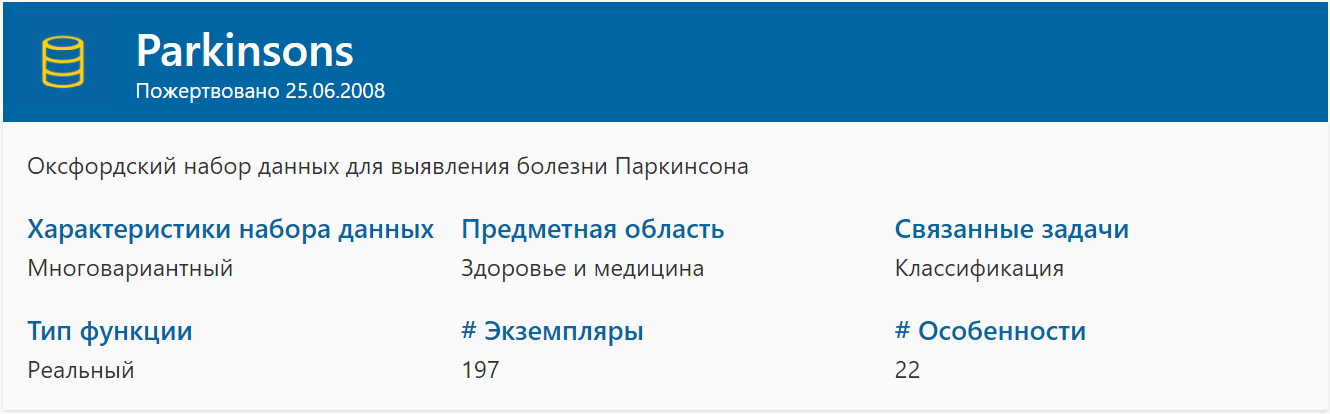

# Загрузка данных и библиотек

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons = fetch_ucirepo(id=174)

# data (as pandas dataframes)
X = parkinsons.data.features
y = parkinsons.data.targets

# metadata
print(parkinsons.metadata)

# variable information
print(parkinsons.variables)


{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'published_in': 'BioMedical Engineering OnLine', 'year': 2007, 'url': 'https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b8

Информация о наборе данных

Дополнительная информация

Этот набор данных состоит из ряда биомедицинских измерений голоса 31 человека, из них 23 с болезнью Паркинсона (БП). Каждый столбец в таблице соответствует определенному показателю голоса, и каждая строка соответствует одной из 195 записей голоса этих людей (столбец "имя"). Основная цель сбора данных - отличить здоровых людей от людей с БП в соответствии со столбцом "статус", для которого установлено значение 0 для "здоров" и 1 для БП.

 Данные представлены в формате ASCII CSV. Строки CSV-файла содержат экземпляр, соответствующий одной записи голоса. На каждого пациента приходится около шести записей, имя пациента указано в первом столбце.Для получения дополнительной информации или комментариев, пожалуйста, свяжитесь с Максом Литтлом (littlem '@' robots.ox.ac.uk).

 Более подробная информация содержится в следующей ссылке - если вы используете этот набор данных, пожалуйста, укажите:
 Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

Дополнительная информация о переменных

Записи в столбцах матрицы (атрибуты):

 name - имя субъекта в формате ASCII и номер записи

 MDVP:Fo(Гц) - средняя основная частота голоса

 MDVP:Fhi(Гц) - максимальная основная частота голоса

 MDVP:Flo(Гц) - минимальная основная частота голоса

 MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - несколько показателей изменения основной частоты

 MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - несколько показателей изменения амплитуды

 NHR, HNR - Два показателя отношения шума к тональным компонентам в голосе

 status - Состояние здоровья субъекта (один) - болезнь Паркинсона, (ноль) - здоровый

 RPDE, D2 - Два показателя нелинейной динамической сложности

 DFA - Показатель фрактального масштабирования сигналов

 spread1, spread2, PPE - Три нелинейных показателя изменения основной частоты


In [3]:
!pip install adjdatatools

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjdatatools.preprocessing import AdjustedScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

import warnings as wr
wr.filterwarnings('ignore')

In [5]:
df = pd.concat([X, y], axis=1)
df

MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  \
0    119.992   157.302    74.997      0.00784      0.00784   0.00370   
1    122.400   148.650   113.819      0.00968      0.00968   0.00465   
2    116.682   131.111   111.555      0.01050      0.01050   0.00544   
3    116.676   137.871   111.366      0.00997      0.00997   0.00502   
4    116.014   141.781   110.655      0.01284      0.01284   0.00655   
..       ...       ...       ...          ...          ...       ...   
190  174.188   230.978    94.261      0.00459      0.00459   0.00263   
191  209.516   253.017    89.488      0.00564      0.00564   0.00331   
192  174.688   240.005    74.287      0.01360      0.01360   0.00624   
193  198.764   396.961    74.904      0.00740      0.00740   0.00370   
194  214.289   260.277    77.973      0.00567      0.00567   0.00295   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  Shimmer:DDA  \
0     0.00554     0.01109       0.04374       0.04374  ...      0.06545   
1     0.00696     0.01394       0.06134       0.06134  ...      0.09403   
2     0.00781     0.01633       0.05233       0.05233  ...      0.08270   
3     0.00698     0.01505       0.05492       0.05492  ...      0.08771   
4     0.00908     0.01966       0.06425       0.06425  ...      0.10470   
..        ...         ...           ...           ...  ...          ...   
190   0.00259     0.00790       0.04087       0.04087  ...      0.07008   
191   0.00292     0.00994       0.02751       0.02751  ...      0.04812   
192   0.00564     0.01873       0.02308       0.02308  ...      0.03804   
193   0.00390     0.01109       0.02296       0.02296  ...      0.03794   
194   0.00317     0.00885       0.01884       0.01884  ...      0.03078   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0    0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1    0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2    0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3    0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4    0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   
..       ...     ...       ...       ...       ...       ...       ...   
190  0.02764  19.517  0.448439  0.657899 -6.538586  0.121952  2.657476   
191  0.01810  19.147  0.431674  0.683244 -6.195325  0.129303  2.784312   
192  0.10715  17.883  0.407567  0.655683 -6.787197  0.158453  2.679772   
193  0.07223  19.020  0.451221  0.643956 -6.744577  0.207454  2.138608   
194  0.04398  21.209  0.462803  0.664357 -5.724056  0.190667  2.555477   

          PPE  status  
0    0.284654       1  
1    0.368674       1  
2    0.332634       1  
3    0.368975       1  
4    0.410335       1  
..        ...     ...  
190  0.133050       0  
191  0.168895       0  
192  0.131728       0  
193  0.123306       0  
194  0.148569       0  

[195 rows x 23 columns]

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo       195 non-null    float64
 1   MDVP:Fhi      195 non-null    float64
 2   MDVP:Flo      195 non-null    float64
 3   MDVP:Jitter   195 non-null    float64
 4   MDVP:Jitter   195 non-null    float64
 5   MDVP:RAP      195 non-null    float64
 6   MDVP:PPQ      195 non-null    float64
 7   Jitter:DDP    195 non-null    float64
 8   MDVP:Shimmer  195 non-null    float64
 9   MDVP:Shimmer  195 non-null    float64
 10  Shimmer:APQ3  195 non-null    float64
 11  Shimmer:APQ5  195 non-null    float64
 12  MDVP:APQ      195 non-null    float64
 13  Shimmer:DDA   195 non-null    float64
 14  NHR           195 non-null    float64
 15  HNR           195 non-null    float64
 16  RPDE          195 non-null    float64
 17  DFA           195 non-null    float64
 18  spread1       195 non-null    

Пропущенных значений в датасете нет.

In [7]:
for col in list(df.columns):
  print(df[col].describe())

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo, dtype: float64
count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi, dtype: float64
count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo, dtype: float64
       MDVP:Jitter  MDVP:Jitter
count   195.000000   195.000000
mean      0.006220     0.006220
std       0.004848     0.004848
min       0.001680     0.001680
25%       0.003460     0.003460
50%       0.004940     0.004940
75%       0.007365     0.007365
max       0.033160     0.033160
       MDVP:Jitter  MDVP:Jitter
count   195.000000   195.000000
mean      0.006220     0.006220
std       0.004848     0.004848
min       0.

In [8]:
list(df.columns)

['MDVP:Fo',
 'MDVP:Fhi',
 'MDVP:Flo',
 'MDVP:Jitter',
 'MDVP:Jitter',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']

In [9]:
df.columns.duplicated()

array([False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

Есть задвоение столбцов. Необходимо удалить дубликаты.

## Удаление дубликатов

In [10]:
df = df.T.drop_duplicates().T

In [11]:
df.shape

(195, 21)

## Графики плотности распределния для всех столбцов:

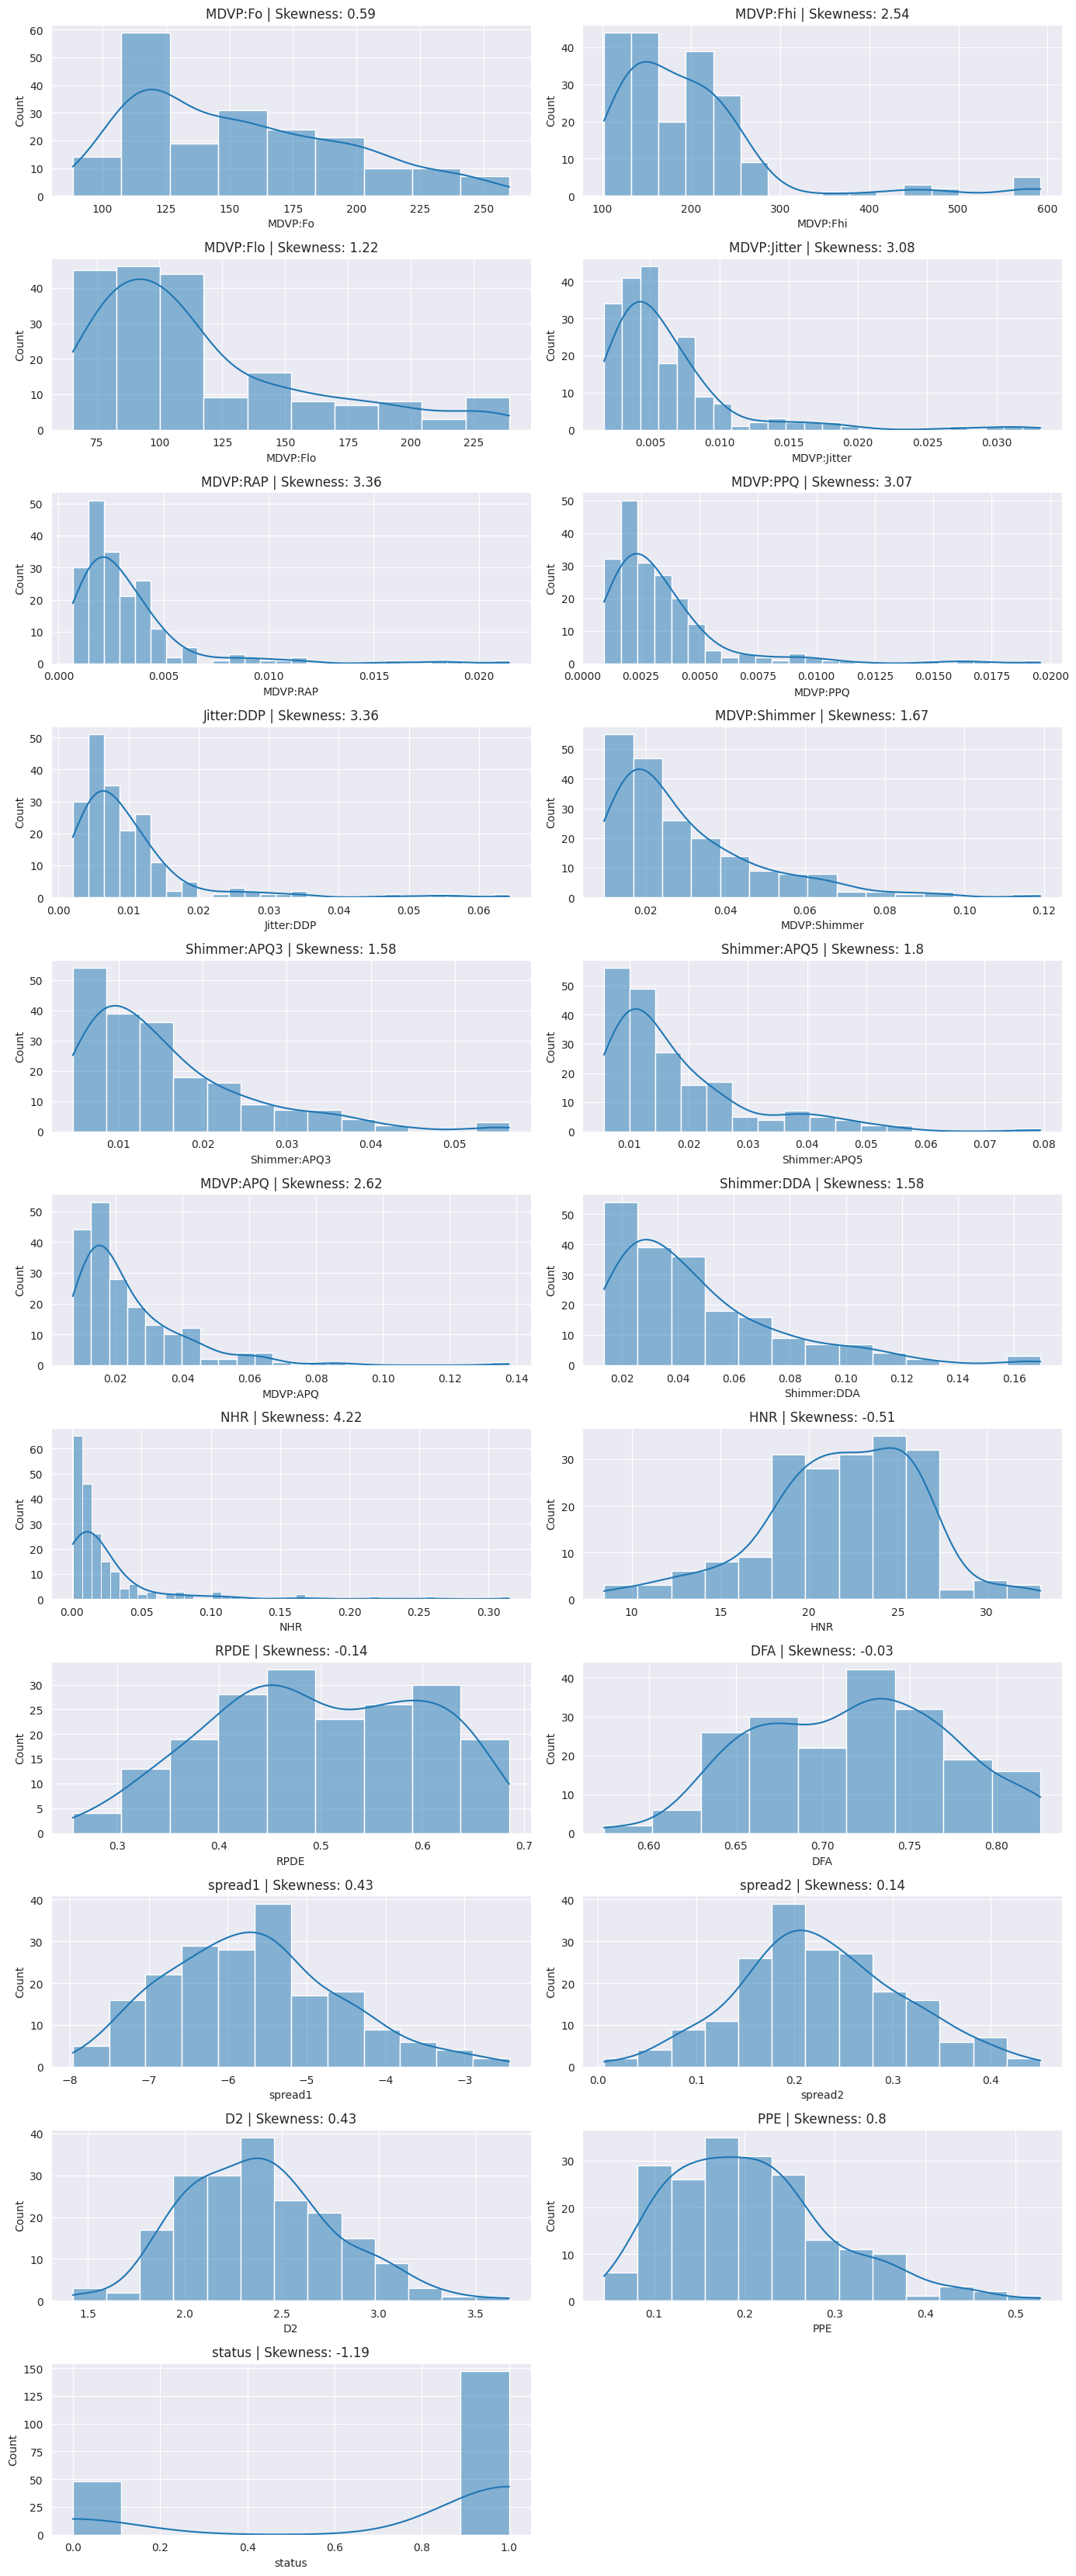

In [12]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Большая часть признаков имеет асимметрию > 1, то есть данные распределены ненормально. Присутствует сильная разница между значениями признаков. Стоит сделать нормализацию или стандартизацию данных, чтобы можно было выбирать любую модель для классификации, или выбирать модели, которые нечувствительны к разнице в значениях. Также виден дисбаланс классов целевой переменной. Необходимо сбалансировать данные.

## Парный график:

<Figure size 1000x600 with 0 Axes>

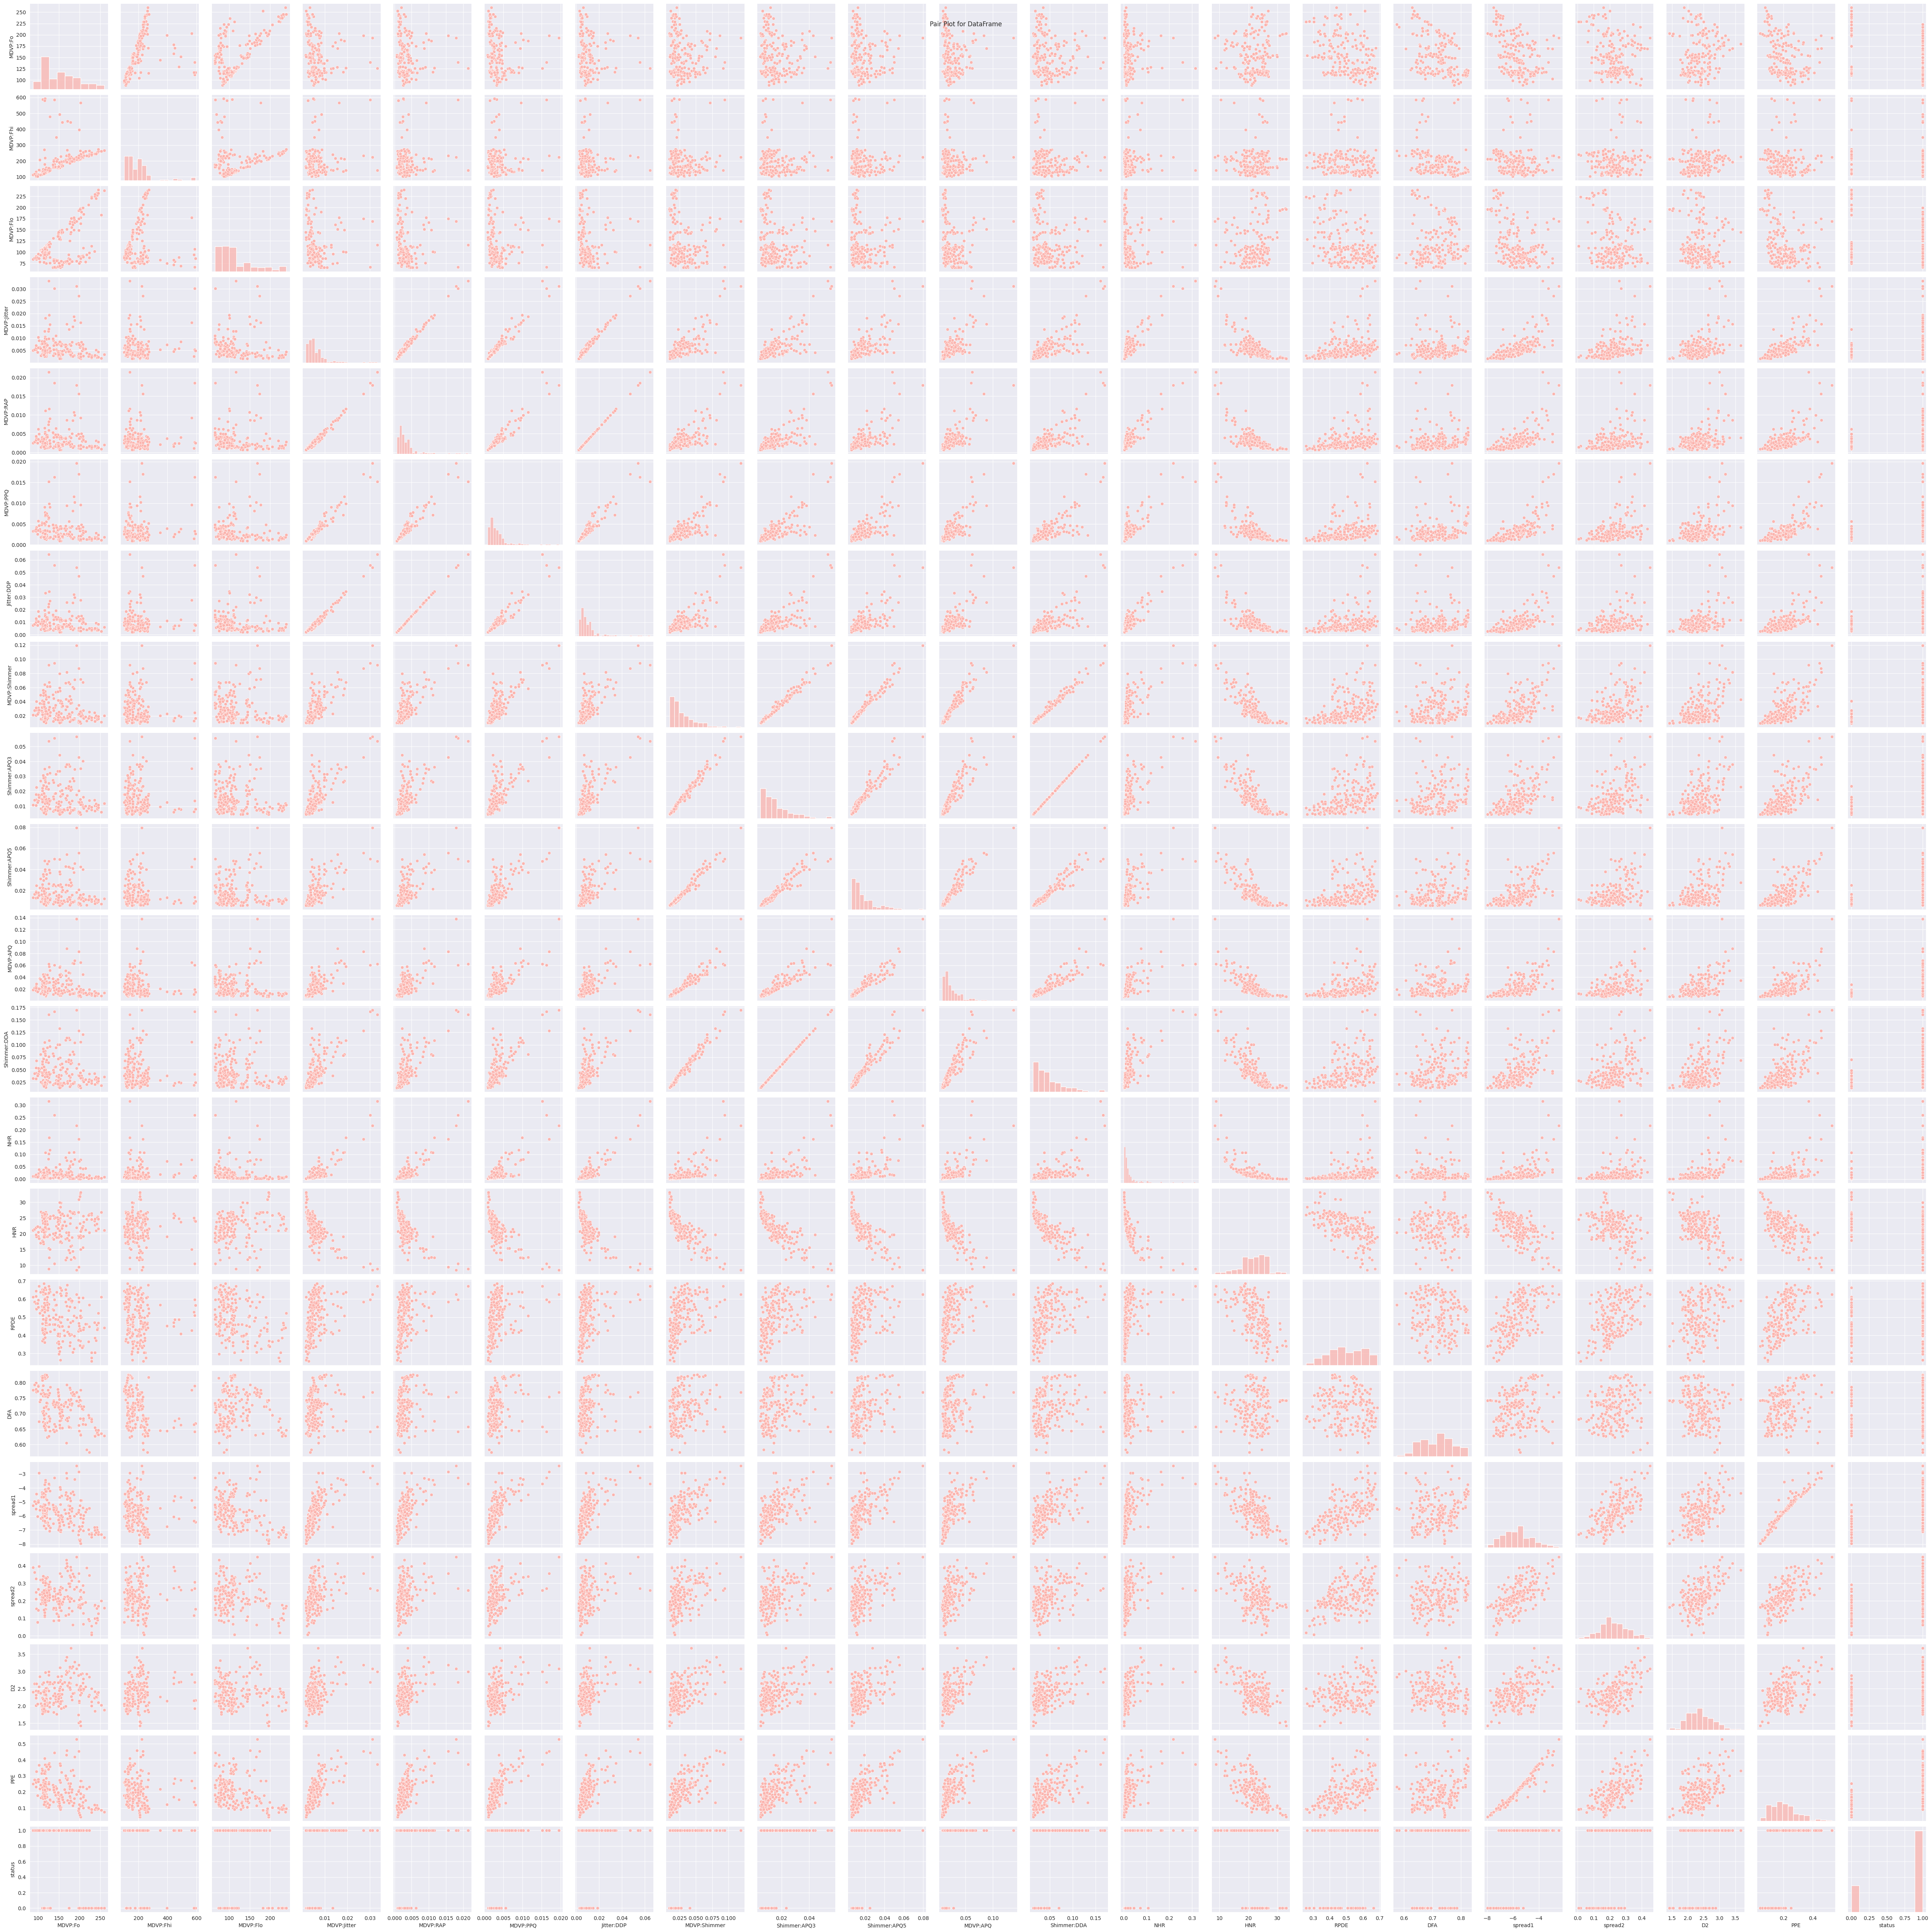

In [13]:
# Set the color palette
sns.set_palette("Pastel1")

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

Есть признаки с сильной корреляцией. Построим матрицу корреляций.

## Матрица корреляций

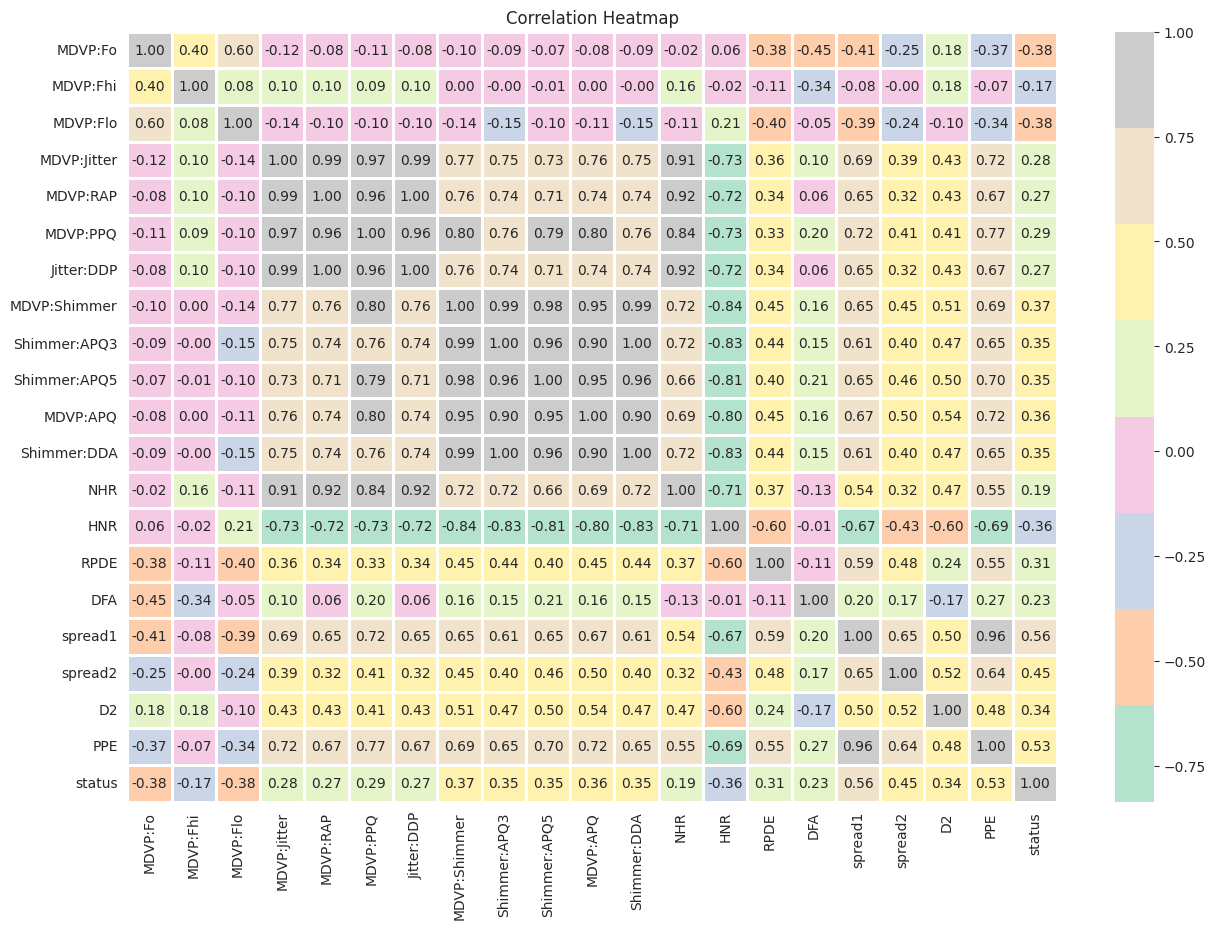

In [14]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Удалим коллинеарные признаки с корреляцией выше 0.75 по модулю, которые выражают одни и те же параметры по данным описания датасета:

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - несколько показателей изменения основной частоты - все сильно коррелируют между собой, оставим только один.

MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - несколько показателей изменения амплитуды - также все коллинеальны, оставим один.

NHR, HNR - Два показателя отношения шума к тональным компонентам в голосе - один из показателей сильно коррелирует с показателями изменения основной частоты (NHR), второй - с показателями изменения амплитуды. Учитывая, что это показатели отношений, то есть получены путем преобразования первичных данных, можно удалить оба.

spread1, spread2, PPE - Три нелинейных показателя изменения основной частоты - spread1 коллинеален с PPE.

### Удаляем коллинеальные признаки

In [15]:
df_new = df.drop(columns=['MDVP:Jitter', 'MDVP:PPQ', 'Jitter:DDP', 'Shimmer:APQ3', 'MDVP:Shimmer', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'PPE'])

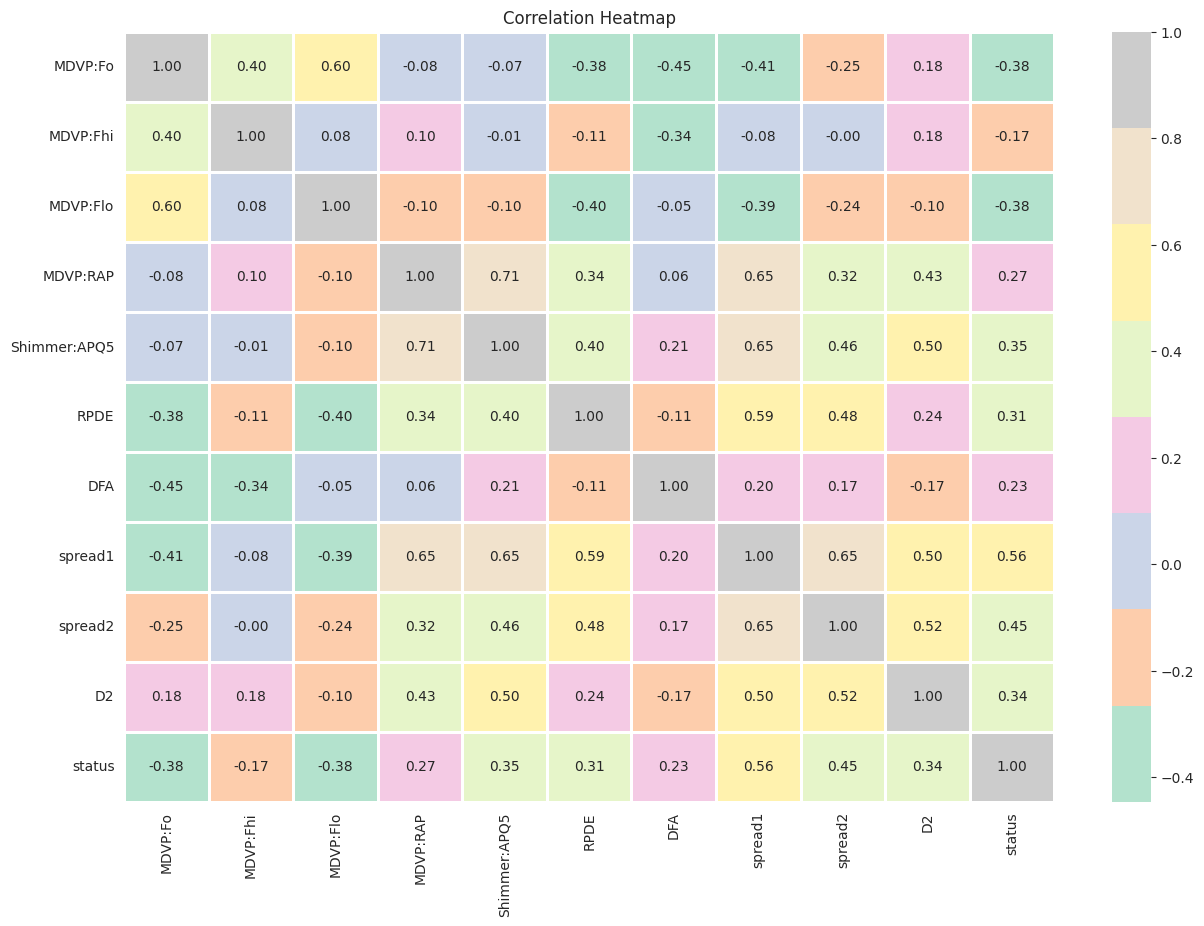

In [16]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df_new.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Теперь нет коллинеальных признаков с корреляцией выше 0.75 по модулю.

## BoxPlot

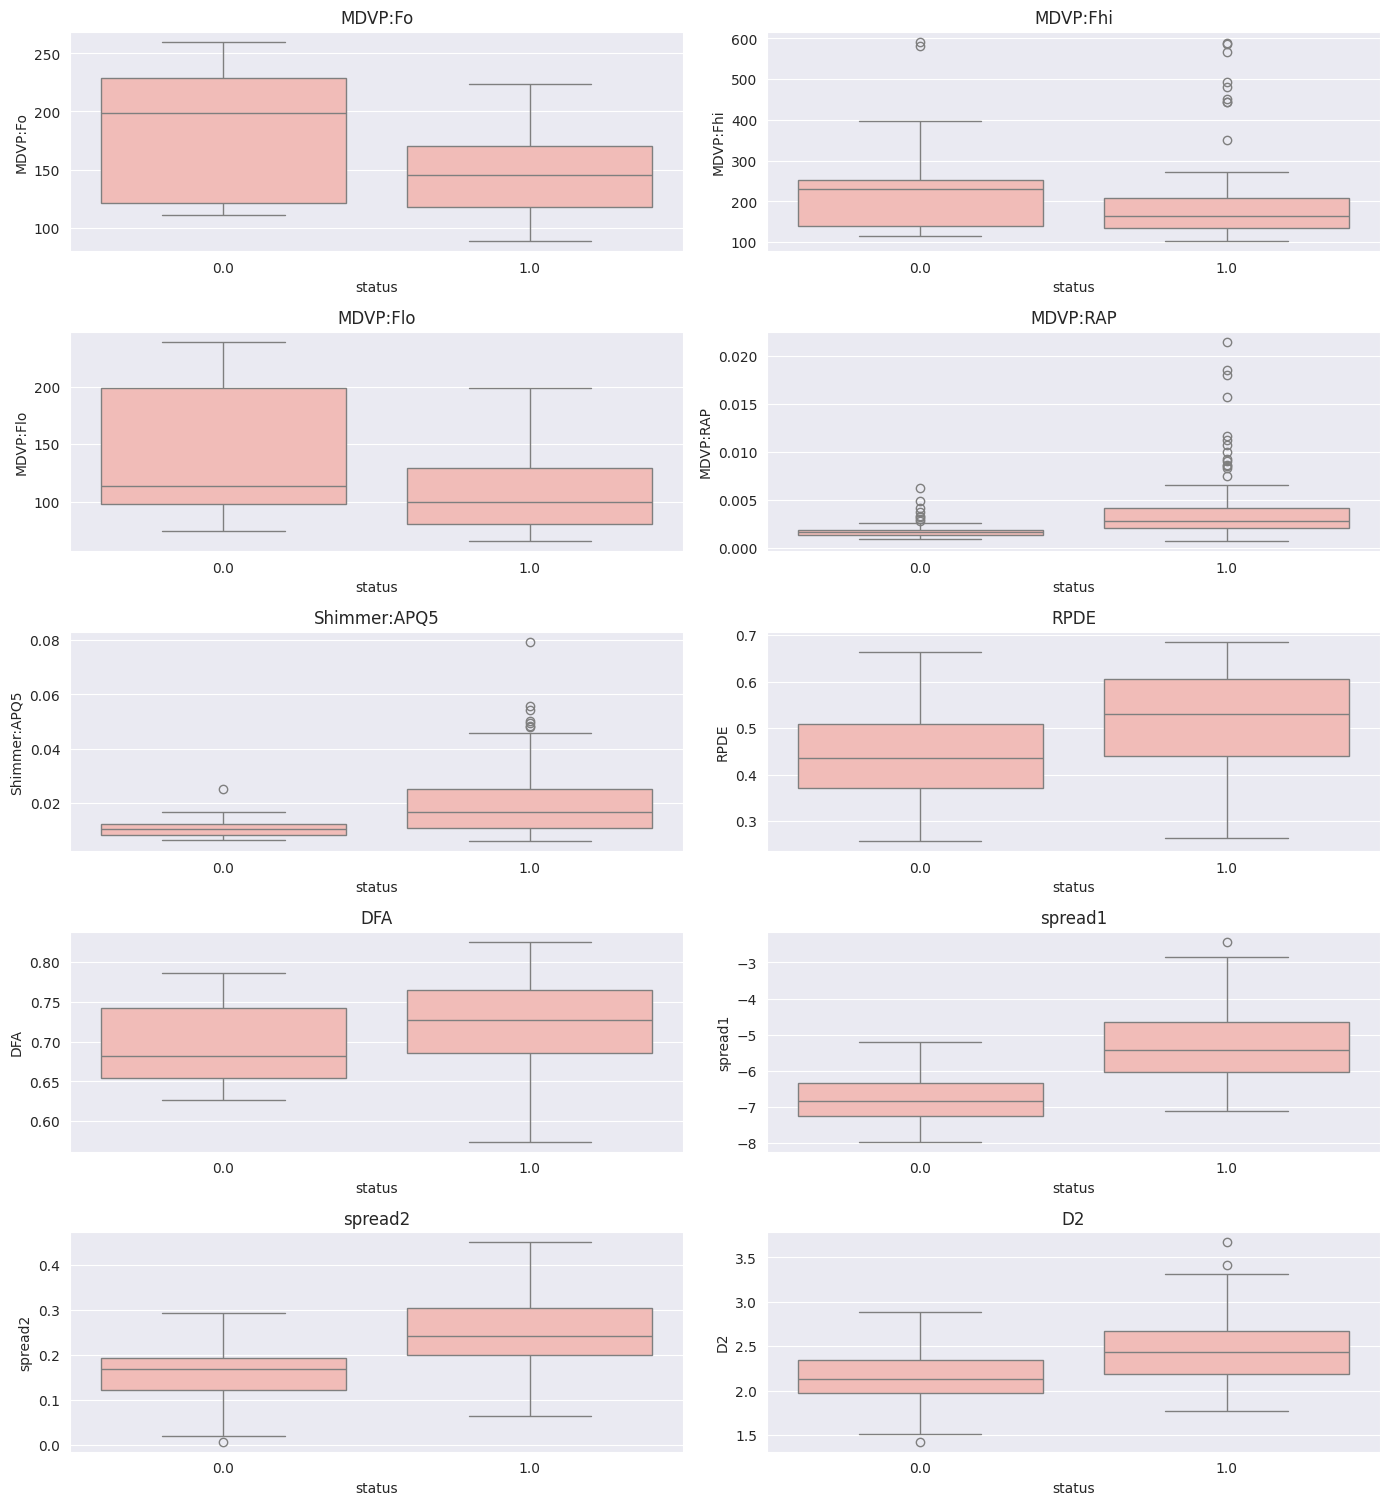

In [17]:
sns.set_style("darkgrid")

df_columns = df_new.drop(columns='status')

plt.figure(figsize=(14, len(df_columns) * 3))
for idx, feature in enumerate(df_columns, 1):
    plt.subplot(len(df_columns), 2, idx)
    sns.boxplot(x=df_new['status'], y=df_new[feature], data=df_new)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

В данных есть выбросы. Воспользуемся adjdatatools для стандартизации данных, он учитывает выбросы.

# Разделение на Х и у:

In [18]:
X = df_new.drop(columns='status')
y = df_new['status']

# Стандартизация данных с помощью adjdatatools

In [19]:
new_scaler = AdjustedScaler()
new_scaler.fit(X)
X_scaled = new_scaler.transform(X)

In [20]:
X_scaled

MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:RAP  Shimmer:APQ5      RPDE       DFA  \
0   -0.167652 -0.054383 -0.168791  0.119166      0.244280 -0.189395  0.370633   
1   -0.153634 -0.079779  0.054717  0.213505      0.434443 -0.087720  0.387509   
2   -0.186922 -0.131261  0.041682  0.291956      0.344020 -0.154134  0.410484   
3   -0.186957 -0.111419  0.040594  0.250248      0.364159 -0.142295  0.386369   
4   -0.190811 -0.099942  0.036501  0.402185      0.476504 -0.183391  0.403297   
..        ...       ...       ...       ...           ...       ...       ...   
190  0.147859  0.161880 -0.057883  0.012910      0.157693 -0.110866 -0.256388   
191  0.353527  0.226571 -0.085363  0.080437      0.042472 -0.149983 -0.155415   
192  0.150770  0.188377 -0.172879  0.371400      0.002466 -0.206232 -0.265217   
193  0.290932  0.649092 -0.169327  0.119166     -0.003562 -0.104375 -0.311937   
194  0.381314  0.247881 -0.151658  0.044687     -0.025483 -0.077351 -0.230660   

      spread1   spread2        D2  
0    0.193342  0.130718 -0.030190  
1    0.350480  0.320512  0.062965  
2    0.272109  0.253454 -0.009683  
3    0.341469  0.316549  0.022118  
4    0.420207  0.042920 -0.014747  
..        ...       ...       ...  
190 -0.174149 -0.266211  0.148689  
191 -0.101045 -0.246023  0.212414  
192 -0.227096 -0.165967  0.159891  
193 -0.218019 -0.031393 -0.112002  
194 -0.000679 -0.077496  0.097442  

[195 rows x 10 columns]

# Балансировка классов с помощью SMOTE

In [21]:
oversample = SMOTE()
X_scaled, y = oversample.fit_resample(X_scaled, y)

# Разбиение на трейн и тест

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y,
                                                    train_size=0.75,
                                                    random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (220, 10)
X_test shape: (74, 10)


# Подбор модели

## Функция для визуализации результатов

In [23]:
def run_classifier(clf, param_grid, title):
    # -----------------------------------------------------
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf,
                            param_distributions = param_grid,
                            n_iter = n_iter_search,
                            cv = cv,
                            scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    gs.fit(X_train, y_train)
    print("The best parameters are %s" % (gs.best_params_))
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred)*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred)*100))
    # -----------------------------------------------------
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(21, 7))
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    fig.tight_layout()
    # -----------------------------------------------------
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax2.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
    ax2.plot([0, 1], [0, 1],
             linestyle = '--',
             color = (0.6, 0.6, 0.6),
             label = 'Random guessing')
    ax2.plot([0, 0, 1], [0, 1, 1],
             linestyle = ':',
             color = 'black',
             label = 'Perfect performance')
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate (FPR)')
    ax2.set_ylabel('True Positive Rate (TPR)')
    ax2.set_title('Receiver Operator Characteristic (ROC) Curve')
    ax2.legend(loc = "lower right")
    fig.tight_layout()

## Logistic Regression

The best parameters are {'solver': 'liblinear', 'penalty': 'l2'}
Accuracy score: 72.97%
Precision score: 71.79%
Recall score: 75.68%


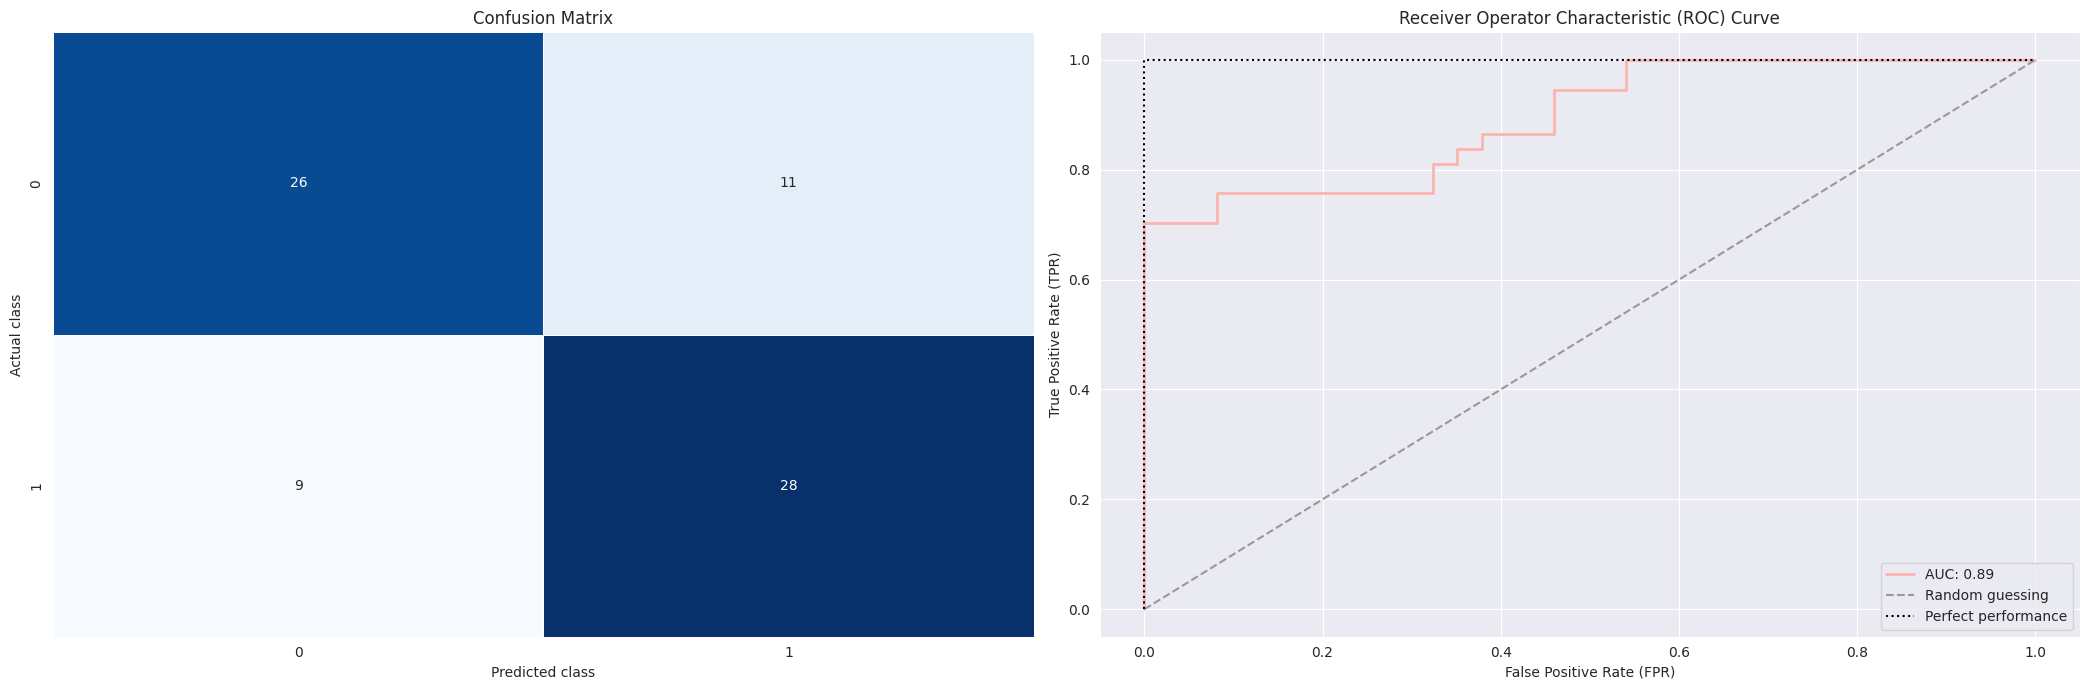

In [24]:
lr = LogisticRegression()

param_grid = {'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

run_classifier(lr, param_grid, 'Logistic Regression')

## k-Nearest Neighbors algorithm (k-NN)

The best parameters are {'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 5, 'algorithm': 'auto'}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


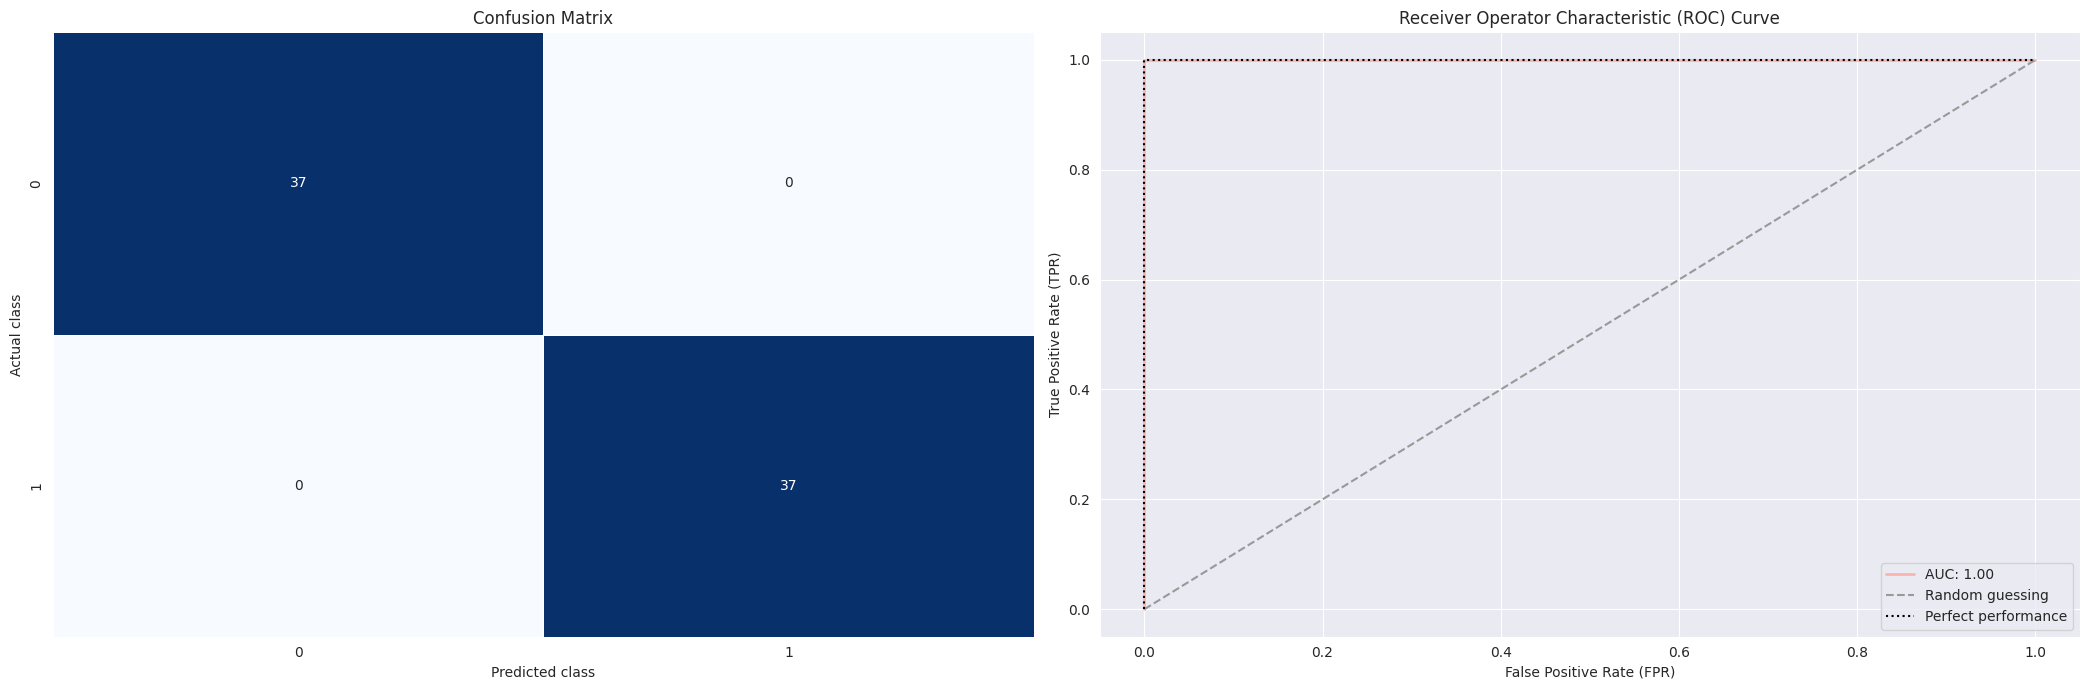

In [25]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,15),
             'weights': ['uniform', 'distance'],
             'leaf_size':[1, 3, 5],
             'algorithm':['auto', 'kd_tree']}

run_classifier(knn, param_grid, 'Nearest Neighbors')

## Naive Bayes

The best parameters are {'priors': None}
Accuracy score: 81.08%
Precision score: 84.85%
Recall score: 75.68%


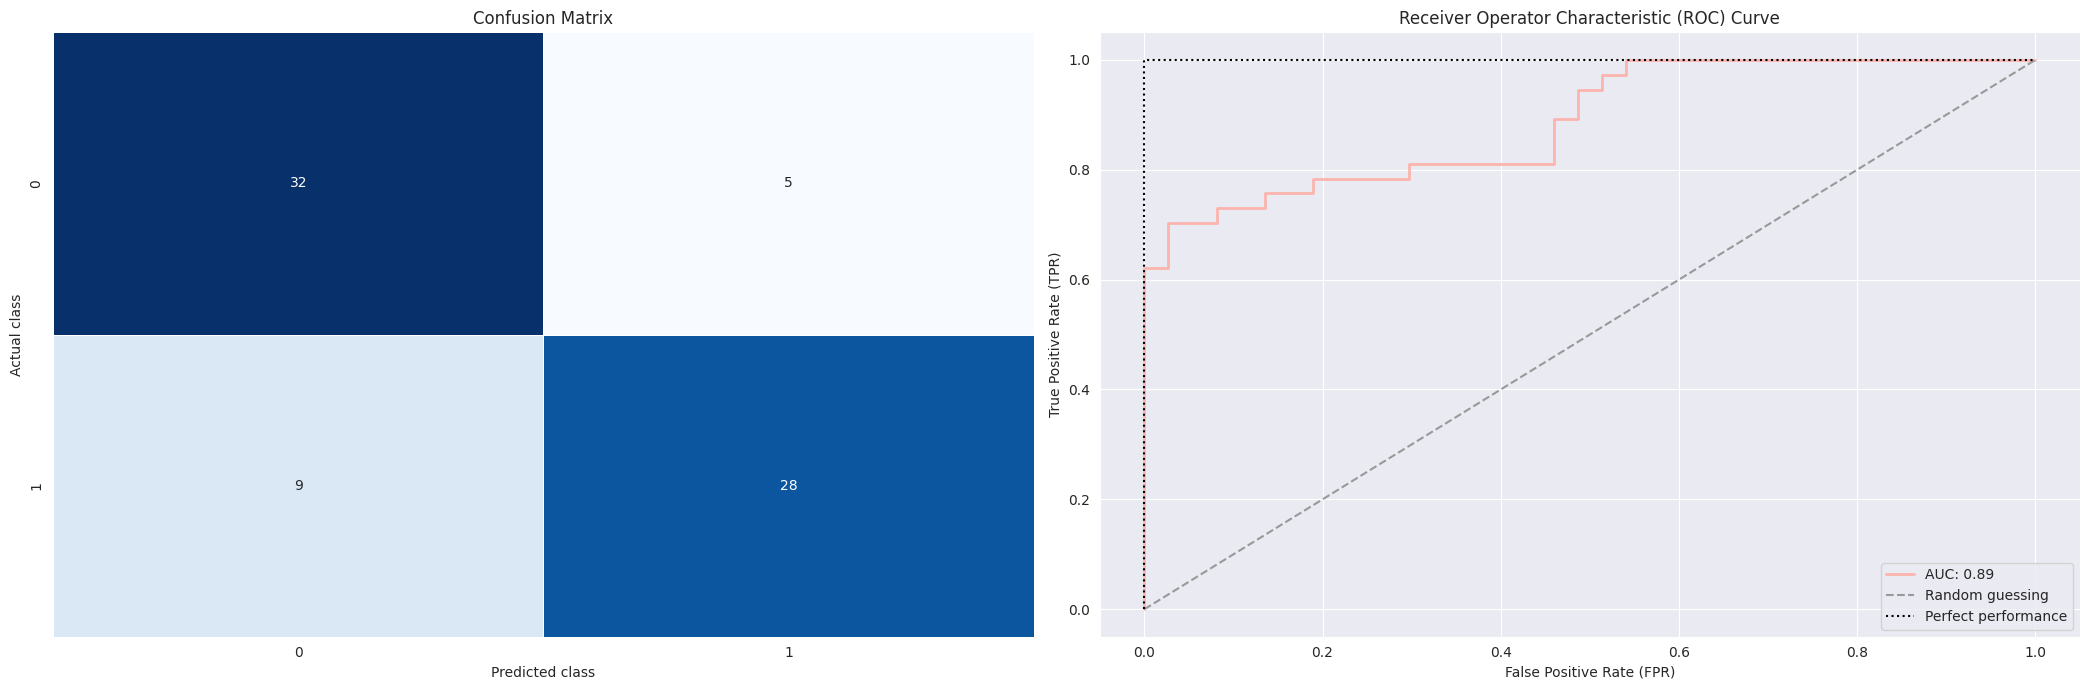

In [26]:
nb = GaussianNB()

param_grid = {'priors': [None]}

run_classifier(nb, param_grid, 'Naive Bayes')

## Linear Support Vector Machines (SVM)

The best parameters are {'gamma': 100.0, 'C': 100.0}
Accuracy score: 83.78%
Precision score: 93.10%
Recall score: 72.97%


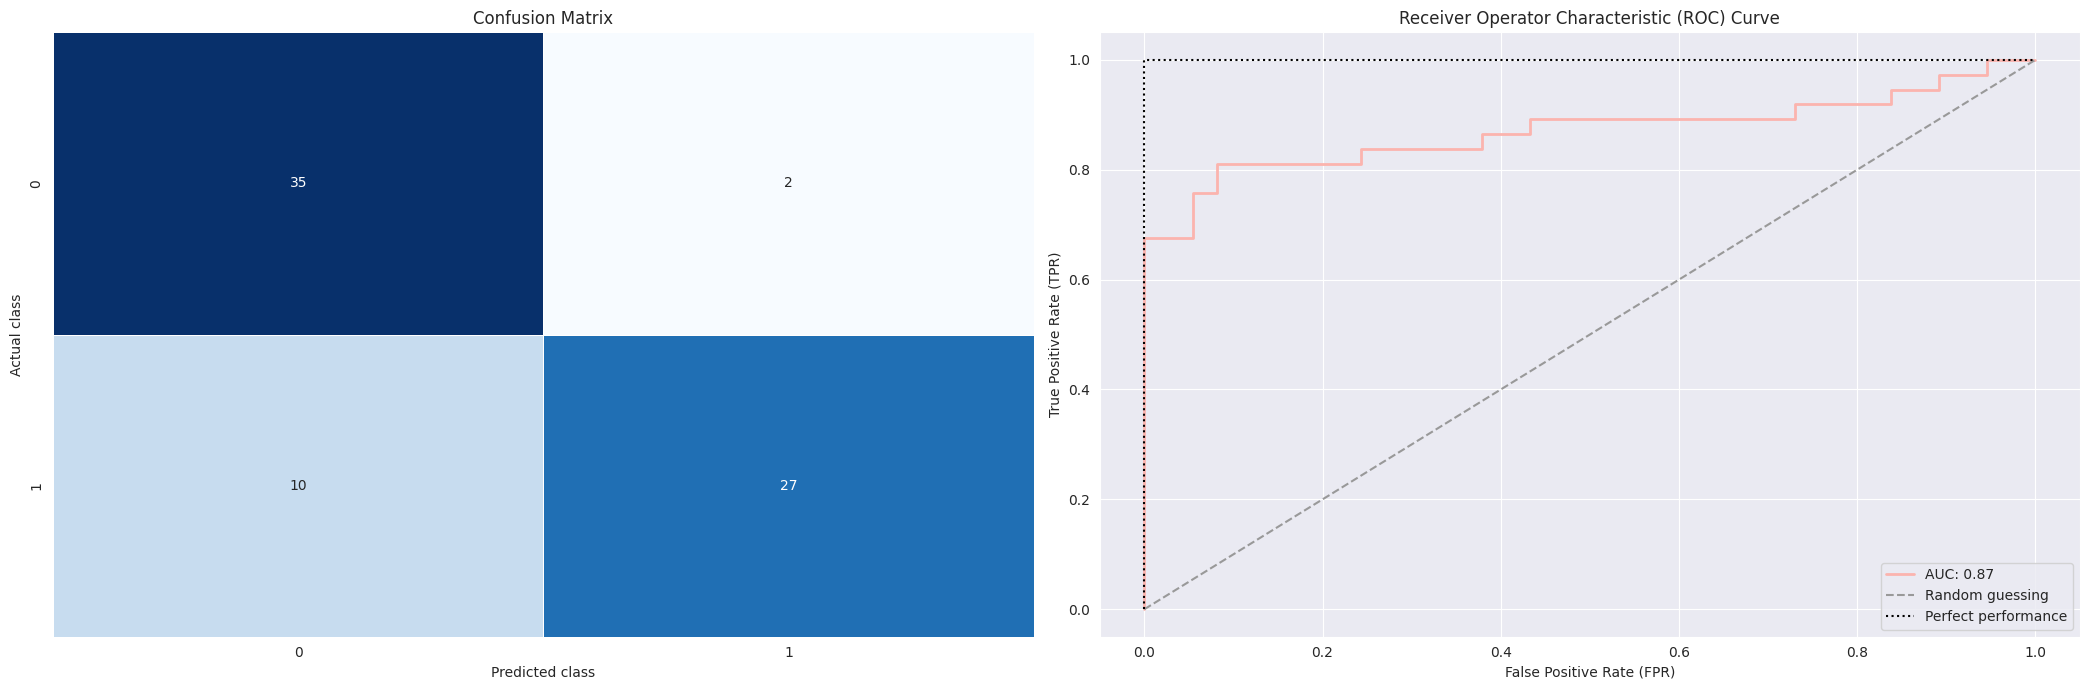

In [27]:
svm_linear = SVC(kernel="linear", probability = True)

param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}

run_classifier(svm_linear, param_grid, 'Linear SVM')

## RBF Support Vector Machines (SVM)

The best parameters are {'gamma': 10.0, 'C': 100.0}
Accuracy score: 98.65%
Precision score: 97.37%
Recall score: 100.00%


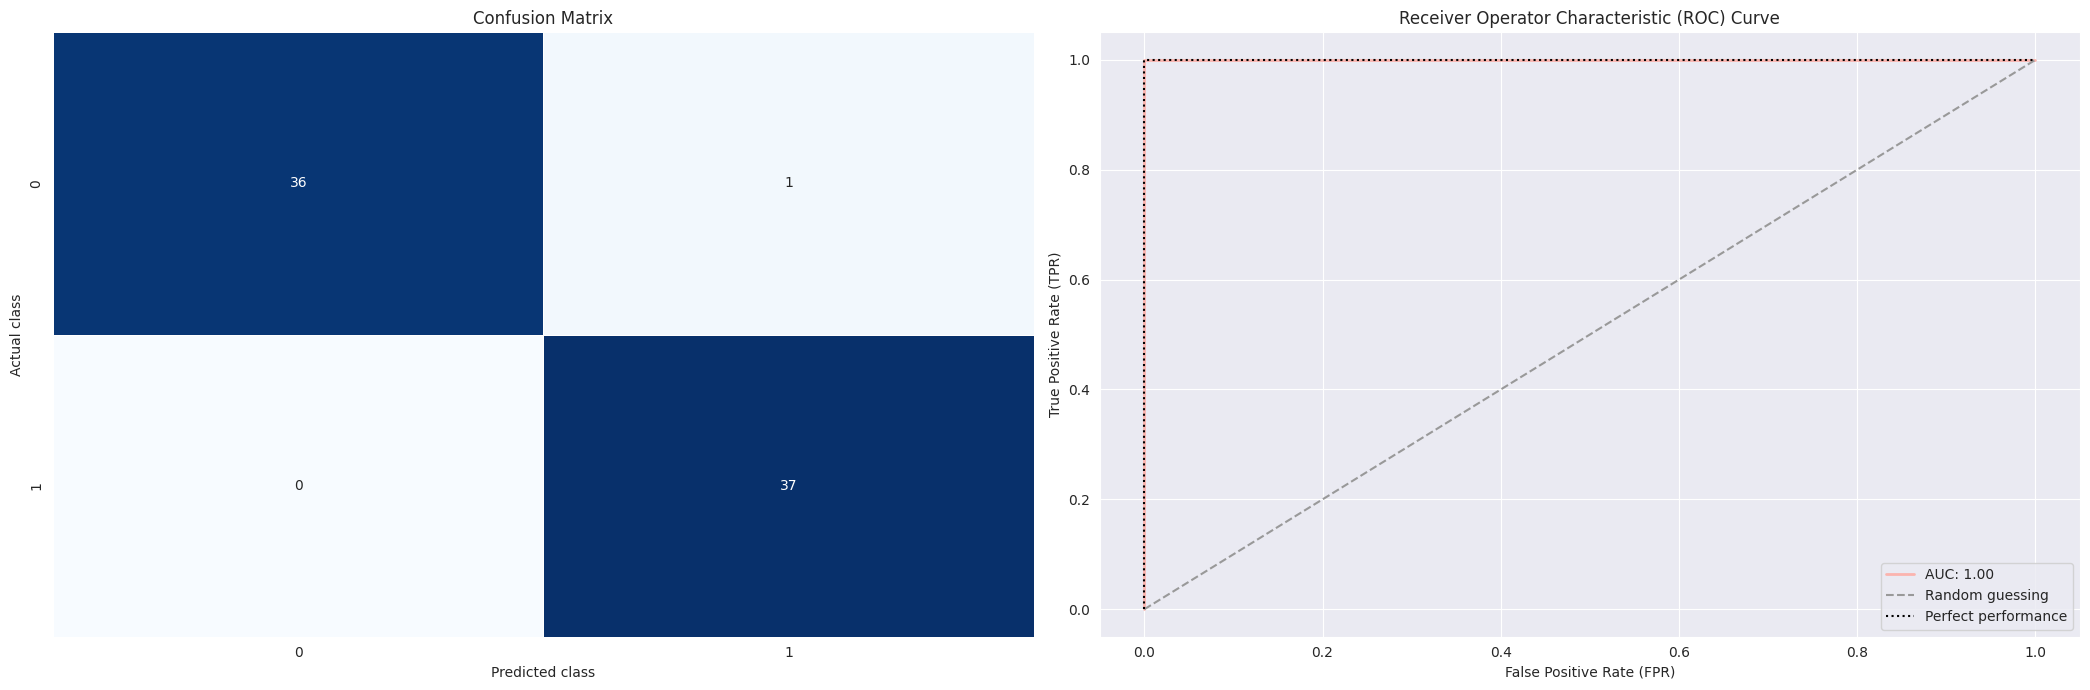

In [28]:
svm_rbf = SVC(kernel="rbf", probability=True)

param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}

run_classifier(svm_rbf, param_grid, "RBF SVM")

## Decision Tree

The best parameters are {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 11, 'criterion': 'gini'}
Accuracy score: 91.89%
Precision score: 94.29%
Recall score: 89.19%


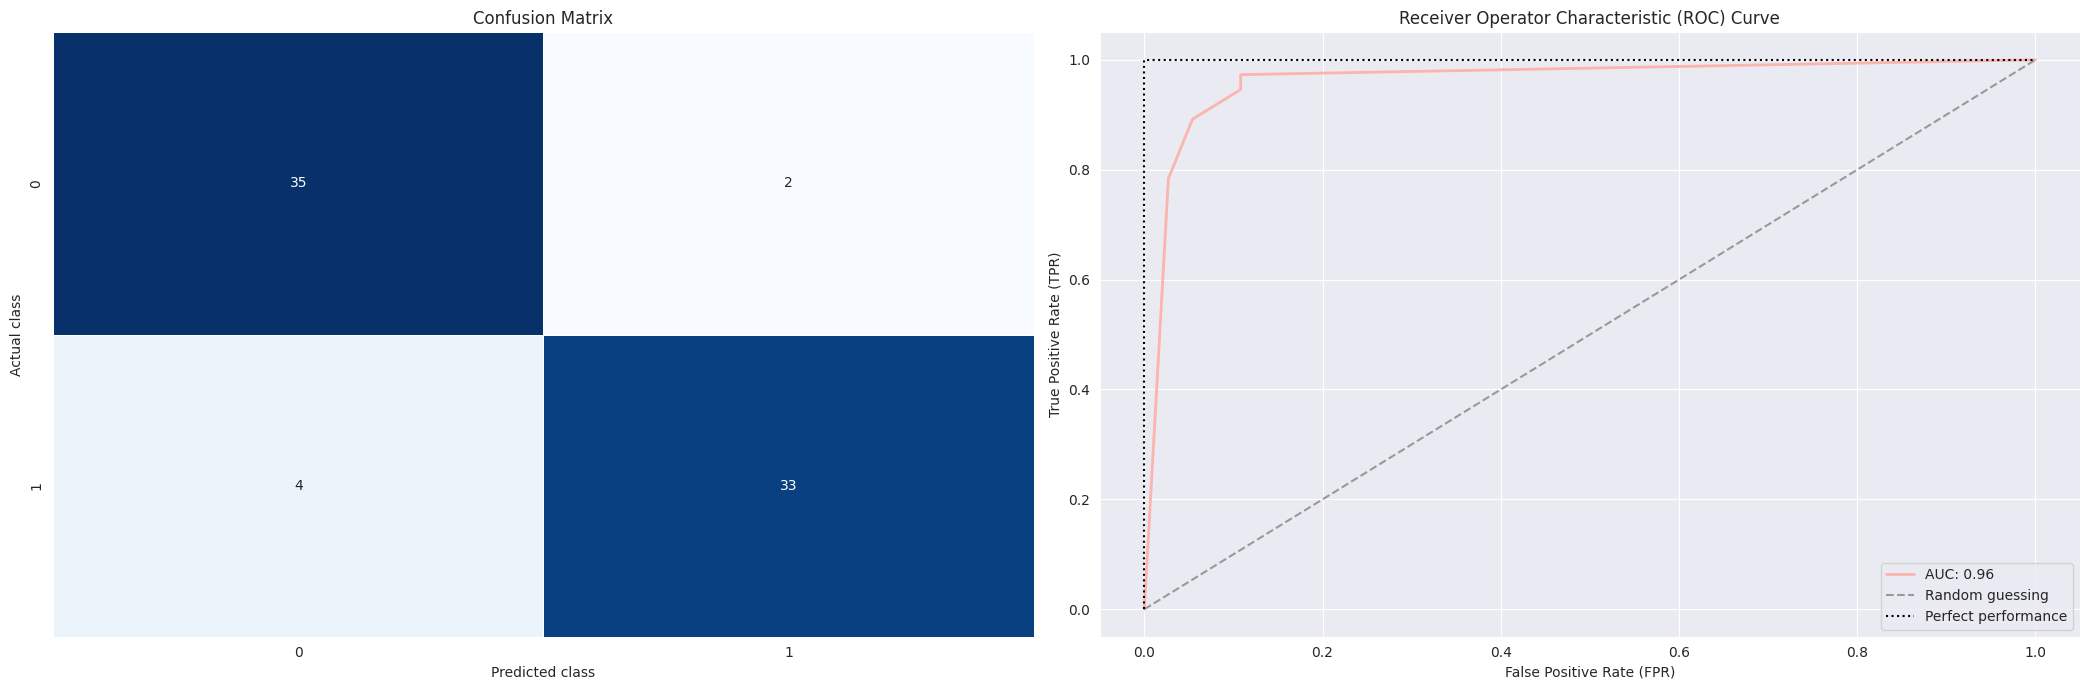

In [29]:
dtree = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 20, 2),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto', 'sqrt', 'log2', None]}

run_classifier(dtree, param_grid, "Decision Tree")

## Random Forest

The best parameters are {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Accuracy score: 97.30%
Precision score: 94.87%
Recall score: 100.00%


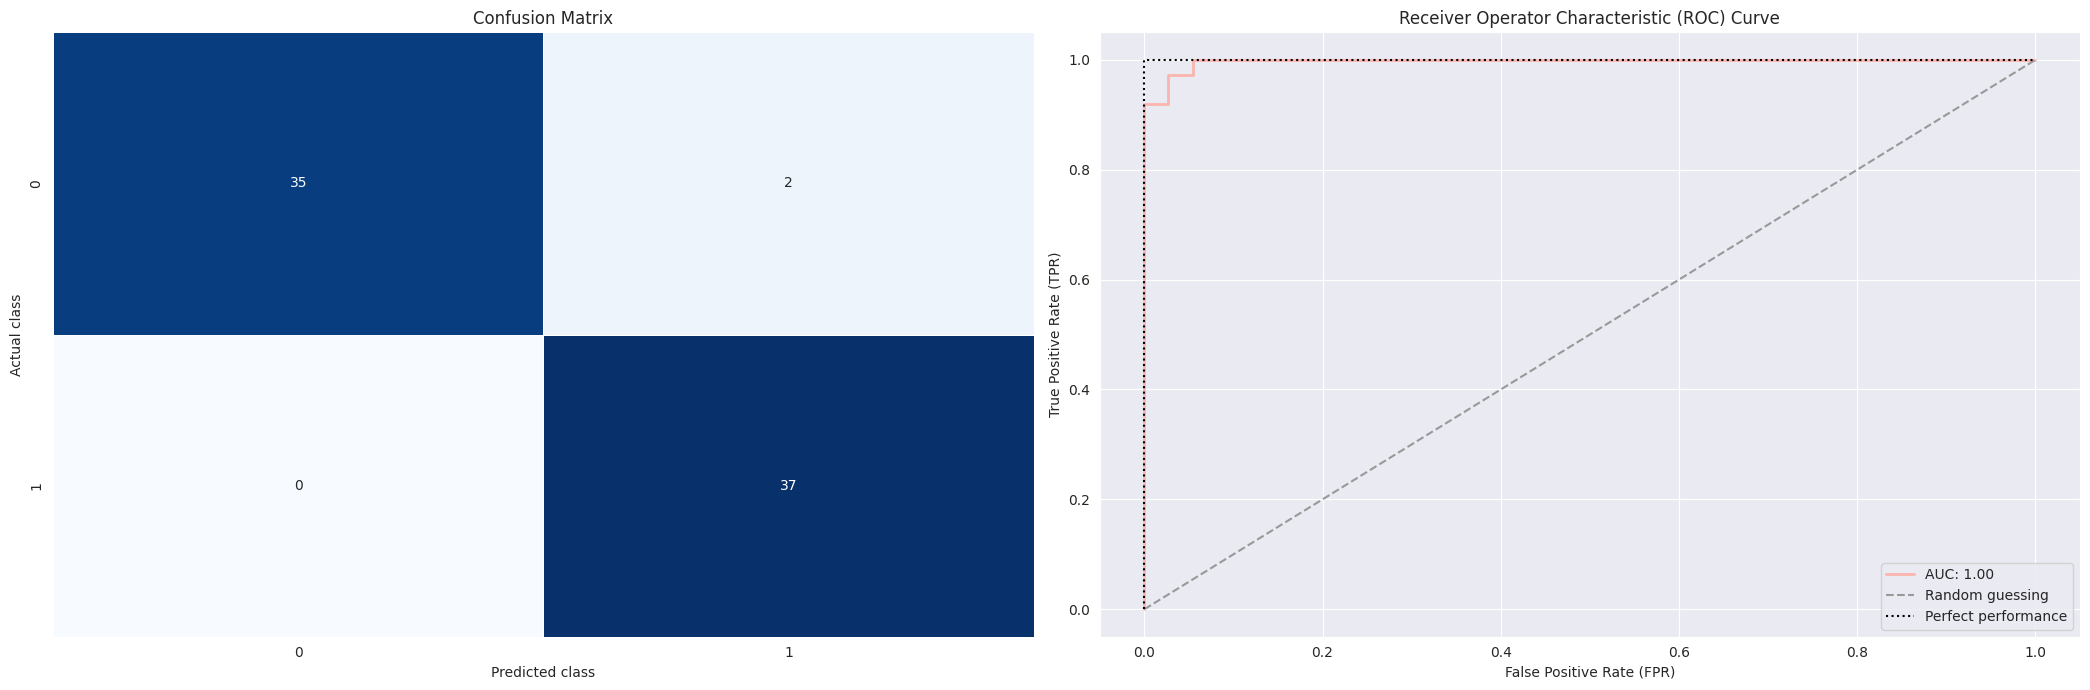

In [30]:
rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

run_classifier(rf, param_grid, 'Random Forest')

## Quadratic Discriminant Analysis

The best parameters are {'reg_param': 0.0, 'priors': None}
Accuracy score: 90.54%
Precision score: 94.12%
Recall score: 86.49%


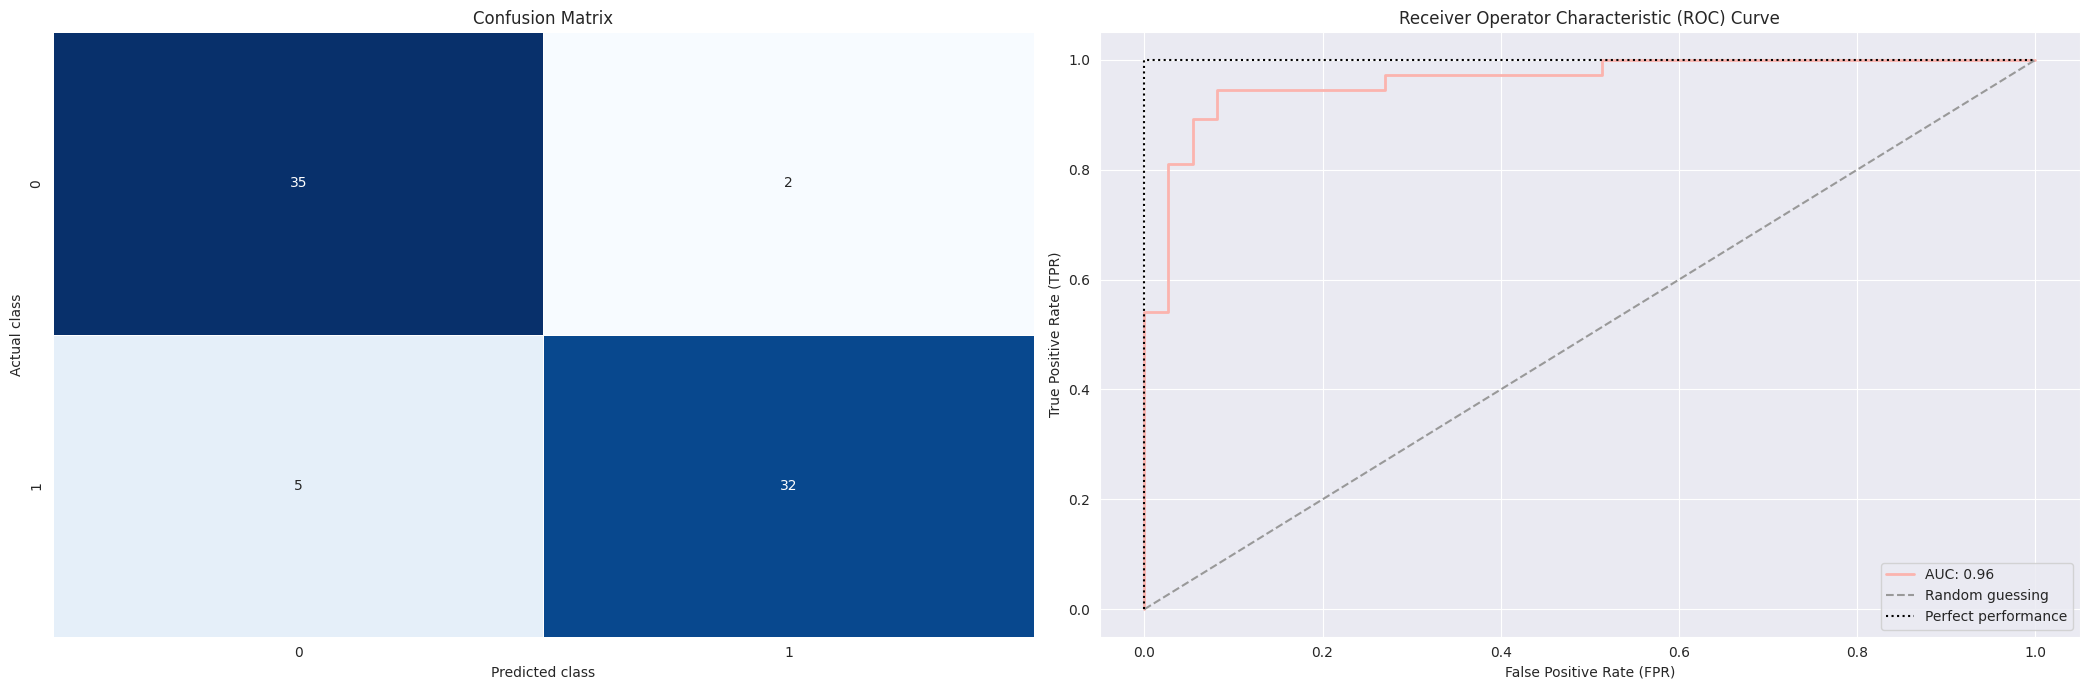

In [31]:
qda = QuadraticDiscriminantAnalysis()

param_grid = {'priors': [None],
              'reg_param': np.arange(0., 1., 0.1)}

run_classifier(qda, param_grid, "QDA")

## Voting Classifier

The best parameters are {'weights': [1, 1, 1]}
Accuracy score: 95.95%
Precision score: 100.00%
Recall score: 91.89%


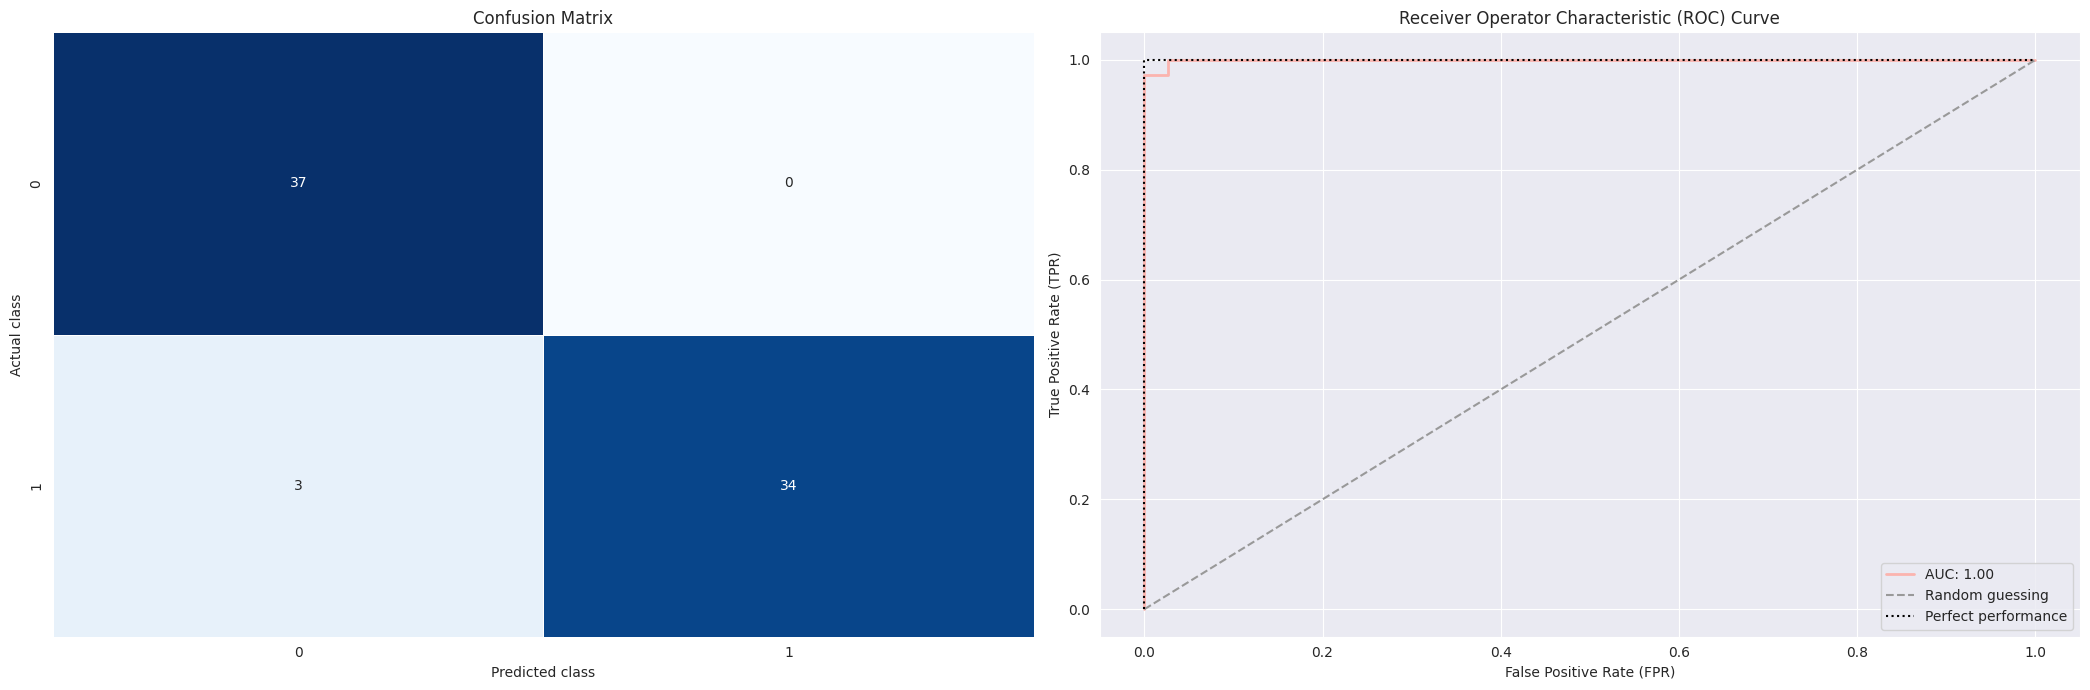

In [32]:
vc = VotingClassifier(estimators=[('knn', knn), ('dt', dtree), ('svc', svm_rbf)],
                        voting='soft')

param_grid = {'weights': [[1, 1, 1], [2, 1, 2], [3, 1, 3]]}

run_classifier(vc, param_grid, "Voting Classifier")

## Multi-layer Perceptron

The best parameters are {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50,), 'alpha': 0.1, 'activation': 'relu'}
Accuracy score: 90.54%
Precision score: 94.12%
Recall score: 86.49%


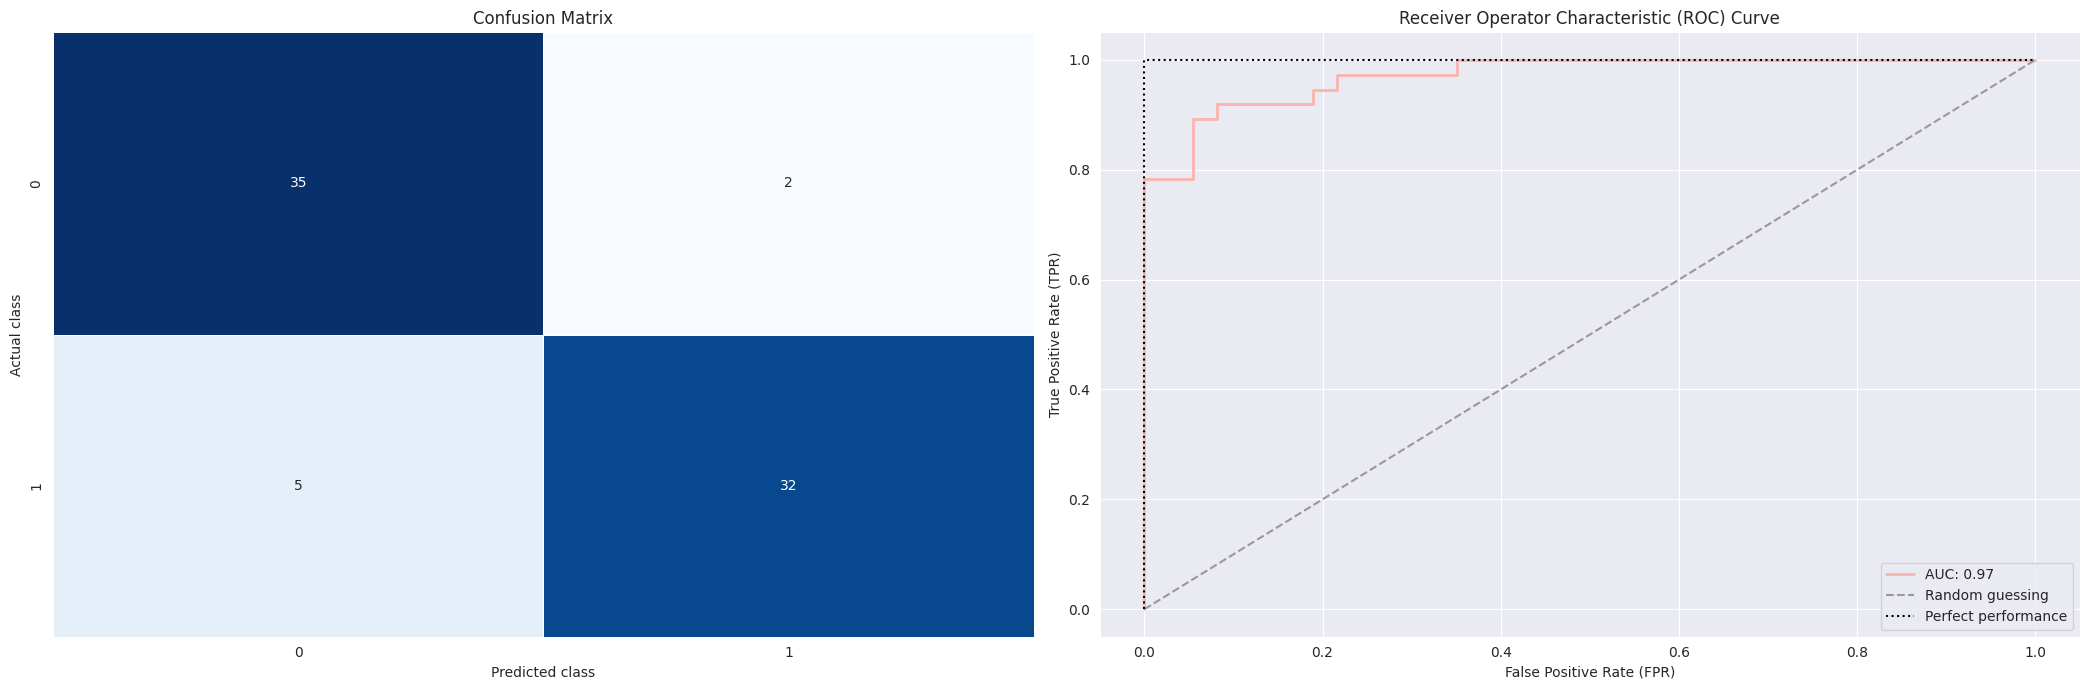

In [33]:
mlp = MLPClassifier()

param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 50)],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha': np.logspace(-5, 3, 5),
             'learning_rate': ['constant', 'invscaling','adaptive'],
             'max_iter': [100, 500, 1000]}

run_classifier(mlp, param_grid, 'Neural Net')

Самые идеальные модели - "К ближайших соседей" (k-Nearest Neighbors algorithm (k-NN)) со 100% точностью в определении классов и "Метод опорных векторов с ядром радиальной базисной функции" (RBF SVM), допустивший 1 ошибку, его метрики:
Accuracy score: 98.65%
Precision score: 97.37%
Recall score: 100.00%


# Визуализация результатов лучших моделей

In [34]:
def graph_tsne(X, y):
  tsne = TSNE(n_components=2, verbose=1, random_state=123)
  X_tsne = tsne.fit_transform(X)
  print(f'Новая размерность Х: {X_tsne.shape}')
  print(f'Расхождение Кульбака-Лейблера после оптимизации: {tsne.kl_divergence_}')
  print(f'Сколько понадобилось итераций: {tsne.n_iter_}')
  graph = pd.DataFrame()
  graph['y'] = y
  graph['comp-1'] = X_tsne[:, 0]
  graph['comp-2'] = X_tsne[:, 1]
  sns.scatterplot(x='comp-1', y='comp-2', hue=graph.y.tolist(),
                  palette=sns.color_palette('Set2', 15),
                  data=graph).set(title='Болезнь Паркинсона (0 - нет, 1 - есть)')
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

[t-SNE] Computing 73 nearest neighbors...
[t-SNE] Indexed 74 samples in 0.001s...
[t-SNE] Computed neighbors for 74 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 0.472715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.342041
[t-SNE] KL divergence after 750 iterations: 0.178770
Новая размерность Х: (74, 2)
Расхождение Кульбака-Лейблера после оптимизации: 0.17876972258090973
Сколько понадобилось итераций: 749


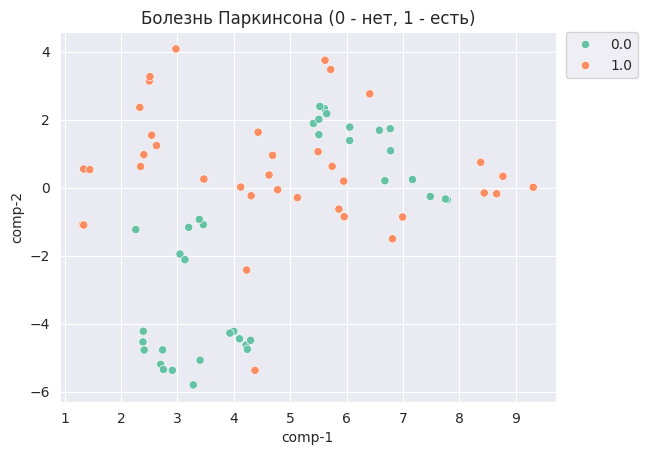

In [35]:
graph_tsne(X_test, y_test)

## k-Nearest Neighbors algorithm

In [36]:
knn_PCA = KNeighborsClassifier(weights='distance', n_neighbors=4, leaf_size=1, algorithm='kd_tree').fit(X_train, y_train)

[t-SNE] Computing 73 nearest neighbors...
[t-SNE] Indexed 74 samples in 0.001s...
[t-SNE] Computed neighbors for 74 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 0.472715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.342041
[t-SNE] KL divergence after 750 iterations: 0.178770
Новая размерность Х: (74, 2)
Расхождение Кульбака-Лейблера после оптимизации: 0.17876972258090973
Сколько понадобилось итераций: 749


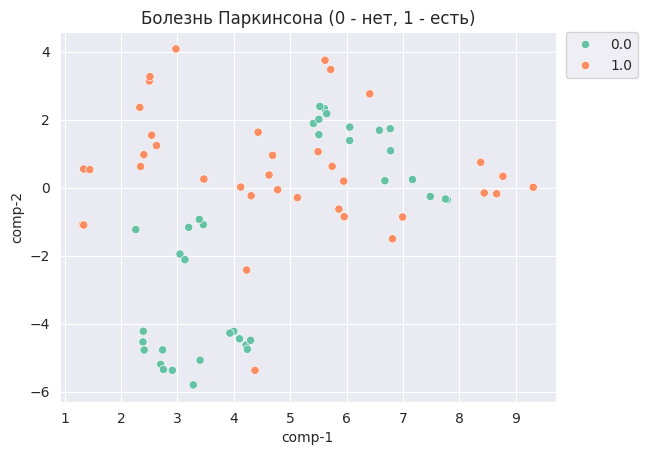

In [37]:
graph_tsne(X_test, pd.DataFrame(knn_PCA.predict(X_test)))

Предсказания полностью совпадают с референсом.

## RBF Support Vector Machines (SVM)

In [38]:
svm_rbf_PCA = SVC(kernel="rbf", probability=True, gamma=10.0, C=10.0).fit(X_train, y_train)

[t-SNE] Computing 73 nearest neighbors...
[t-SNE] Indexed 74 samples in 0.001s...
[t-SNE] Computed neighbors for 74 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 0.472715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.342041
[t-SNE] KL divergence after 750 iterations: 0.178770
Новая размерность Х: (74, 2)
Расхождение Кульбака-Лейблера после оптимизации: 0.17876972258090973
Сколько понадобилось итераций: 749


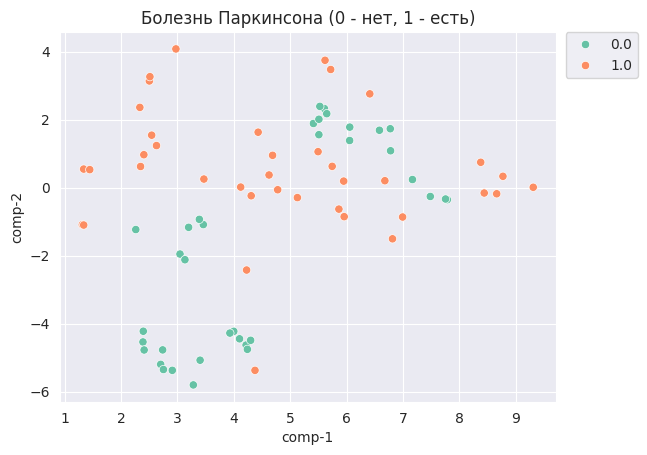

In [39]:
graph_tsne(X_test, pd.DataFrame(svm_rbf_PCA.predict(X_test)))

Допущена одна ошибка.